In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('dipro.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height = image.shape[0] 
width = image.shape[1] 
color = image.shape[2]

In [2]:
print("complexity =" , height*width*color)

complexity = 4267200


In [3]:
for i in range(height):
    for j in range(width):
        for k in range(color):
            image[i][j][k]

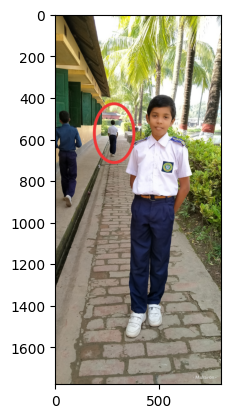

In [4]:
plt.imshow(image)

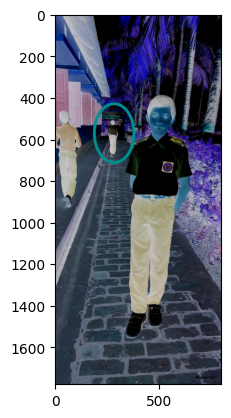

In [5]:
#Linear (Negative and Identity Transformation)
mn=10000000000000000000
for i in range(height):
    for j in range(width):
        for k in range(color):
            mn=min(mn,image[i][j][k])



newimg=np.empty(shape=(height,width,color))

#s=l-1-r
#l range[0-255]

L=int(input("Enter the l value = "))


for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=L-1-image[i][j][k]
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
            
plt.imshow(newimg)




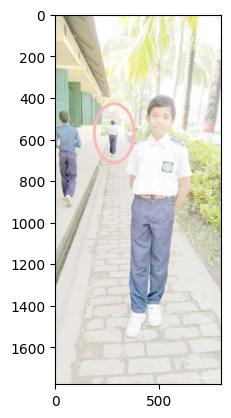

In [6]:
#logarithmic transformation
mx=-1
for i in range(height):
    for j in range(width):
        for k in range(color):
            mx=max(mx,image[i][j][k])



newimg=np.empty(shape=(height,width,color))
#s=c*log(1+r)
#c=255/log(1+maxpixel)

c=255/np.log(1+mx)
for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=c*np.log(1+image[i][j][k])
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
            
plt.imshow(newimg)

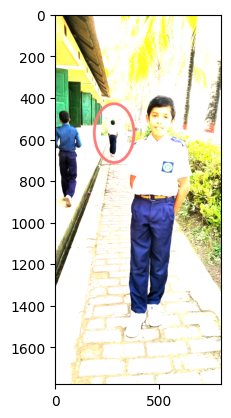

In [7]:
#Power Law or Gamma Correction transformatiom


# use gamma value [.5 to 1.5 to get btter performace] 
# to dark 0.8 
# to bright the image 1.2


gamma=np.float32(input("Enter gamma value = "))

neg=0
if(gamma<0):
    neg=1
    gamma=np.abs(gamma)

newimg=np.empty(shape=(height,width,color))
for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=np.power(image[i][j][k],gamma)
            

            if(neg==1):
                newimg[i][j][k]=1/newimg[i][j][k]
            
           
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
        


plt.imshow(newimg)

In [8]:

samples=int(20)

fig, axs = plt.subplots(int(samples/5), 5, figsize=(15, 15))
#fig, axs = plt.subplots()

gamma=.5
newimg=np.empty(shape=(height,width,color))
for z in range(samples):
    gamma+=.05
    neg=0
    if(gamma<0):
        neg=1
        gamma=np.abs(gamma)

    
    for i in range(height):
        for j in range(width):
            for k in range(color):
                newimg[i][j][k]=np.power(image[i][j][k],gamma)
                

                if(neg==1):
                    newimg[i][j][k]=1/newimg[i][j][k]
                
            
                newimg[i][j][k]=max(0,newimg[i][j][k])
                newimg[i][j][k]=min(255,newimg[i][j][k])
                newimg[i][j][k]/=255


    axs[int(z/5)][z%5].imshow(newimg)
    string="gamma value ="+str(round(gamma,2))
    axs[int(z/5)][z%5].set_title(string)  
    

